In [1]:
from importlib import reload
import sys
import os
sys.path.insert(0, './..')
sys.path.insert(0, './../scripts')

In [2]:
from importlib import reload

import pickle

from math import floor, ceil

import numpy as np
import tensorflow as tf
import logging
from scipy import linalg

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1 import make_axes_locatable

from plot_func import *

import dev_ori_sel_RF
from dev_ori_sel_RF import data_dir,integrator_tf,dynamics,network,run_onelayer,probe_RFs
from dev_ori_sel_RF.tools import misc,update_params_dict,analysis_tools

2023-04-20 11:25:50.879817: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Please install GPU version of TF


2023-04-20 11:25:57.061856: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
reload(misc)

config_name = "mex_hat"

config_dict = misc.load_external_params("params_"+config_name)
config_dict.update({"config_name" : config_name})

N4 = config_dict["N4"]
Nlgn = config_dict["Nlgn"]
Nret = config_dict["Nret"]
Nlgnpop = 2
N4pop = config_dict["num_lgn_paths"] // Nlgnpop

MISC params_dict params_mex_hat {'Nret': 20, 'Nlgn': 20, 'N4': 20, 'N23': 1, 'Nvert': 1, 'runtime': 4000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.07, 'sigma2': 0.2, 'ampl1': 2.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.045, 'ampl': 1.0, 'profile': 'Mexican-hat', 'mean_eccentricity': 0.6, 'SD_eccentrici

In [14]:
reload(run_onelayer)
reload(integrator_tf)

config_dict = misc.load_external_params("params_"+config_name)
config_dict.update({"config_name" : config_name})

Version = 0
run_onelayer.parameter_sweep_layer4(Version,config_dict,not_saving_temp=False)

Please install GPU version of TF
MISC params_dict params_lower_wlim {'Nret': 20, 'Nlgn': 20, 'N4': 20, 'N23': 1, 'Nvert': 1, 'runtime': 4000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.07, 'sigma2': 0.2, 'ampl1': 1.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.045, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_e


KeyboardInterrupt



In [22]:
config_dict = misc.load_external_params("params_"+config_name)
config_dict.update({"config_name" : config_name})

config_dict["Wlgn_to4_params"].update({
    "W_mode": "load_from_external",
    "load_from_prev_run" : 0})

reload(run_onelayer)
reload(integrator_tf)
Version = 1
run_onelayer.parameter_sweep_layer4(Version,config_dict,not_saving_temp=False)

MISC params_dict params_init_gauss {'Nret': 20, 'Nlgn': 20, 'N4': 20, 'N23': 1, 'Nvert': 1, 'runtime': 4000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.07, 'sigma2': 0.2, 'ampl1': 1.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.045, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_eccentricity': 0.6, 'SD_eccentrici

L4 11 57.81135 79.70738 0 0
key dW_lgn_e 11 1.1457816 2.4396572
key dW_lgn_i 11 1.3061931 2.3490396
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(5.4381933, shape=(), dtype=float32)

Plasticity step: 12, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 12 60.222523 77.9054 0 0
key dW_lgn_e 12 1.0975225 2.4072654
key dW_lgn_i 12 1.2296774 2.3538861
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(4.0029883, shape=(), dtype=float32)

Plasticity step: 13, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 13 56.24277 78.34625 0 0
key dW_lgn_e 13 1.0565001 2.3779333
key dW_lgn_i 13 1.2238709 2.2995157
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(4.4875584, shape=(), dtype=float32)

Plasticity step: 14, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 14 60.148838 72.796875 0 0
key dW_lgn_e 14 1.1895169 2.235076
key dW_lgn_i 14 1.3214762 2.24021
CHECK SHAPE2 (320000,)

In [13]:
Version = 31

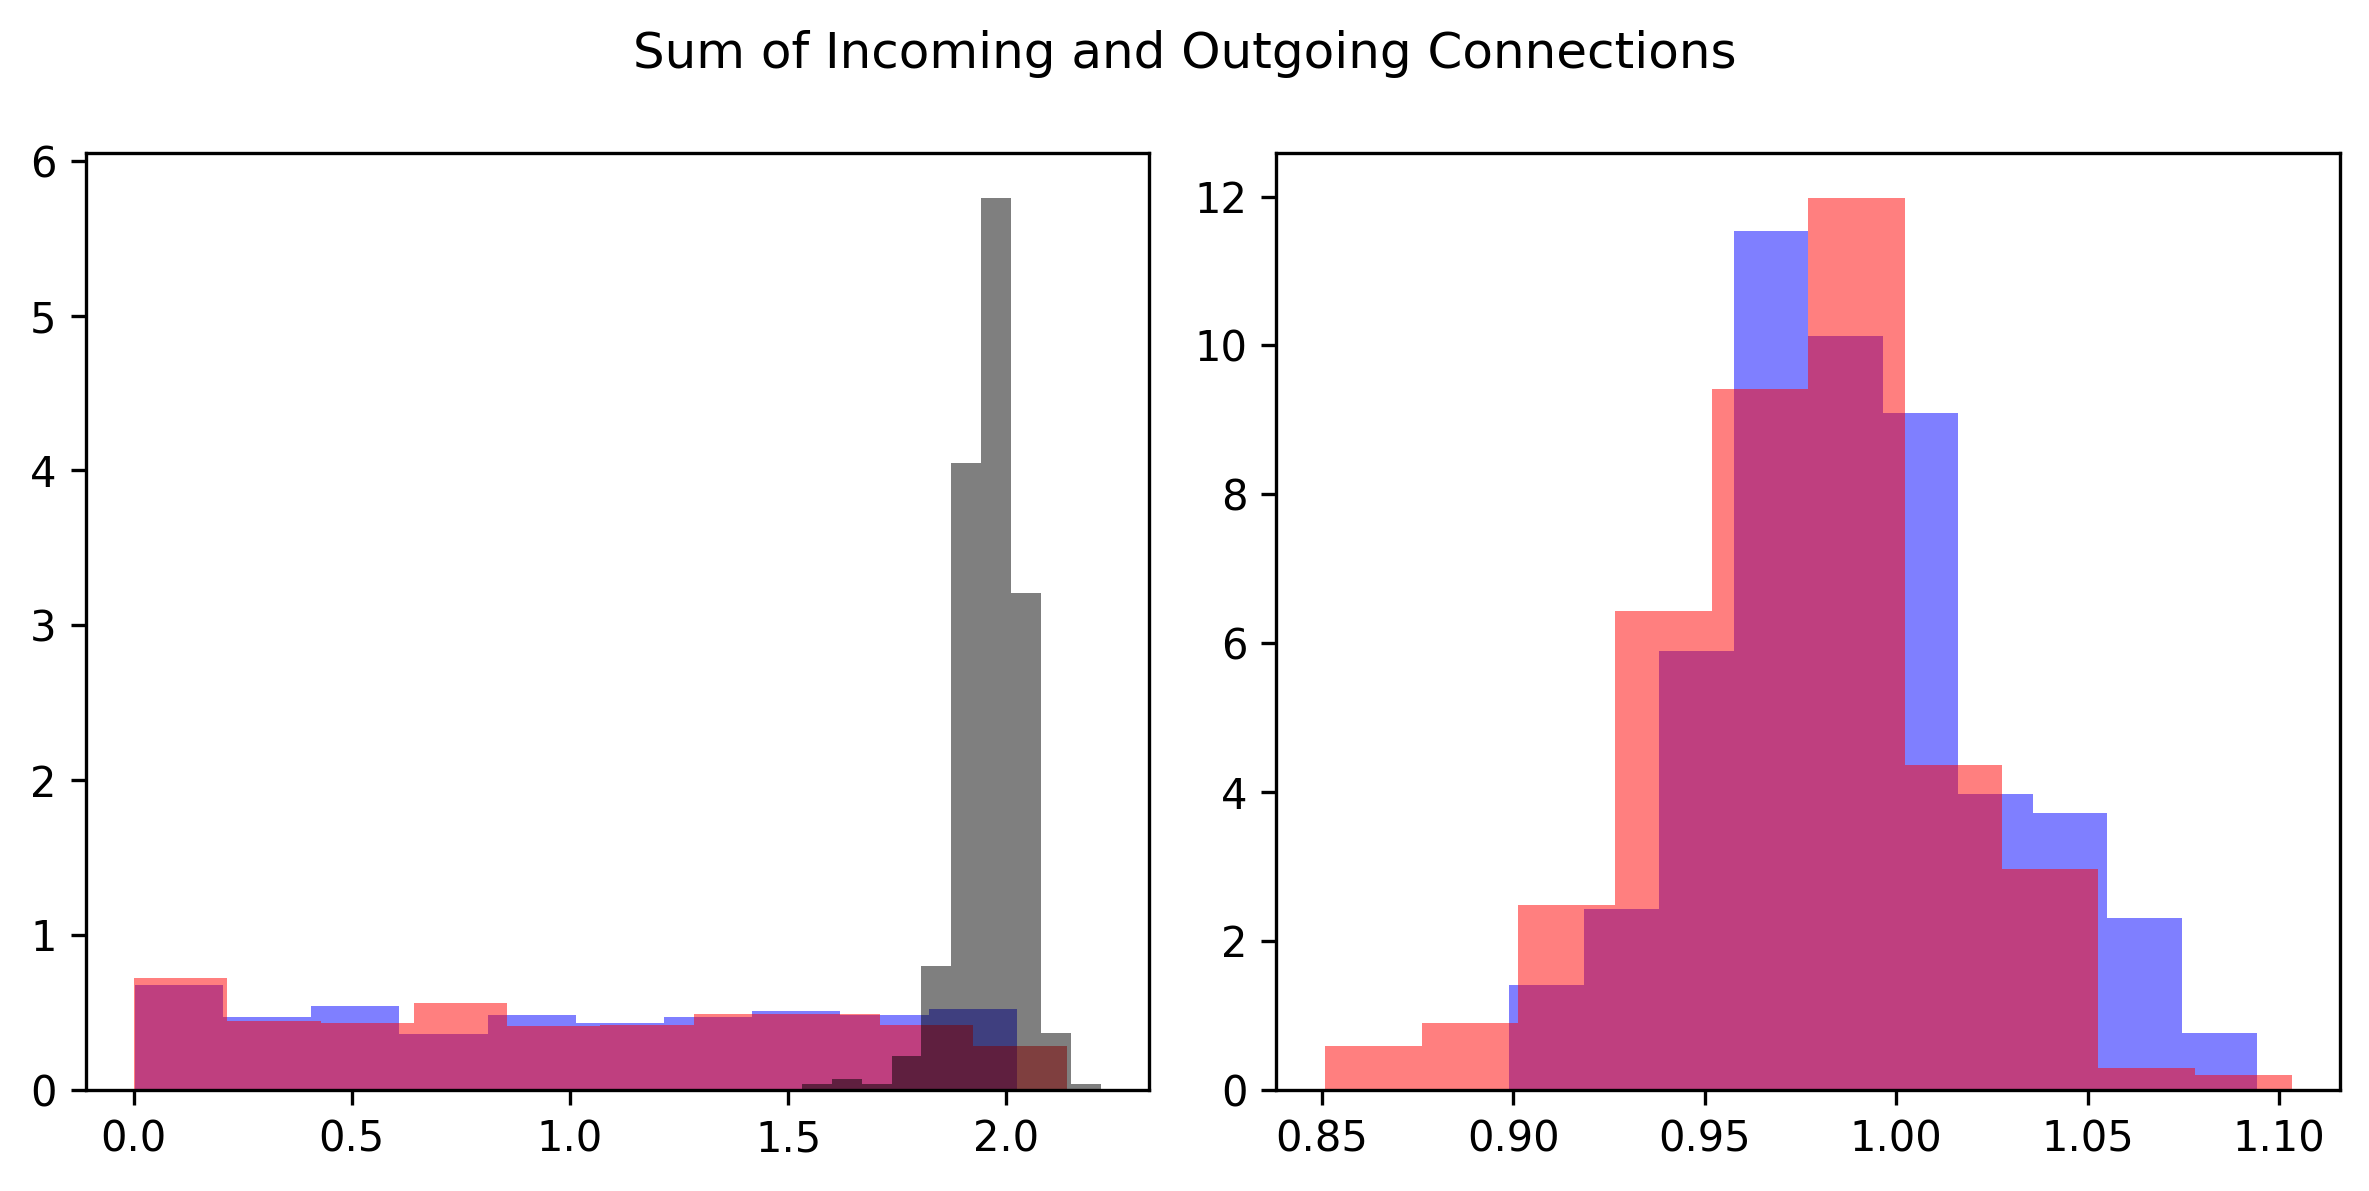

In [14]:
load_location = 'local'
load_path = data_dir + "layer4/{s}/v{v}/".format(s=config_name,v=Version)
probe_config_dict = pickle.load(open(load_path + "config_v{v}.p".format(v=Version),"rb"))
probe_config_dict.update({"config_name" : config_name})
probe_config_dict["Wlgn_to4_params"].update({
    "W_mode": "load_from_external",
    "load_from_prev_run" : Version})
net = network.Network(Version,probe_config_dict,load_location=load_location,verbose=False)

_,Wlgnto4,arbor_on,arbor_off,arbor2,_,W4to4 = net.system
    
fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

for i in range(2):
    axs[0].hist(Wlgnto4.reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn)[0,i].reshape(400,400).sum(1),density=True,
                color=['b','r'][i],alpha=0.5)
    axs[1].hist(Wlgnto4.reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn)[0,i].reshape(400,400).sum(0),density=True,
                color=['b','r'][i],alpha=0.5)
Wpresum = Wlgnto4.reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn)[0,:].reshape(2,400,400).sum((0,2))
axs[0].hist(Wpresum,
            bins=np.linspace(np.min(Wpresum)-0.05,np.max(Wpresum)+0.05,11),density=True,color='k',alpha=0.5)

fig.suptitle(r'Sum of Incoming and Outgoing Connections')
fig.tight_layout()

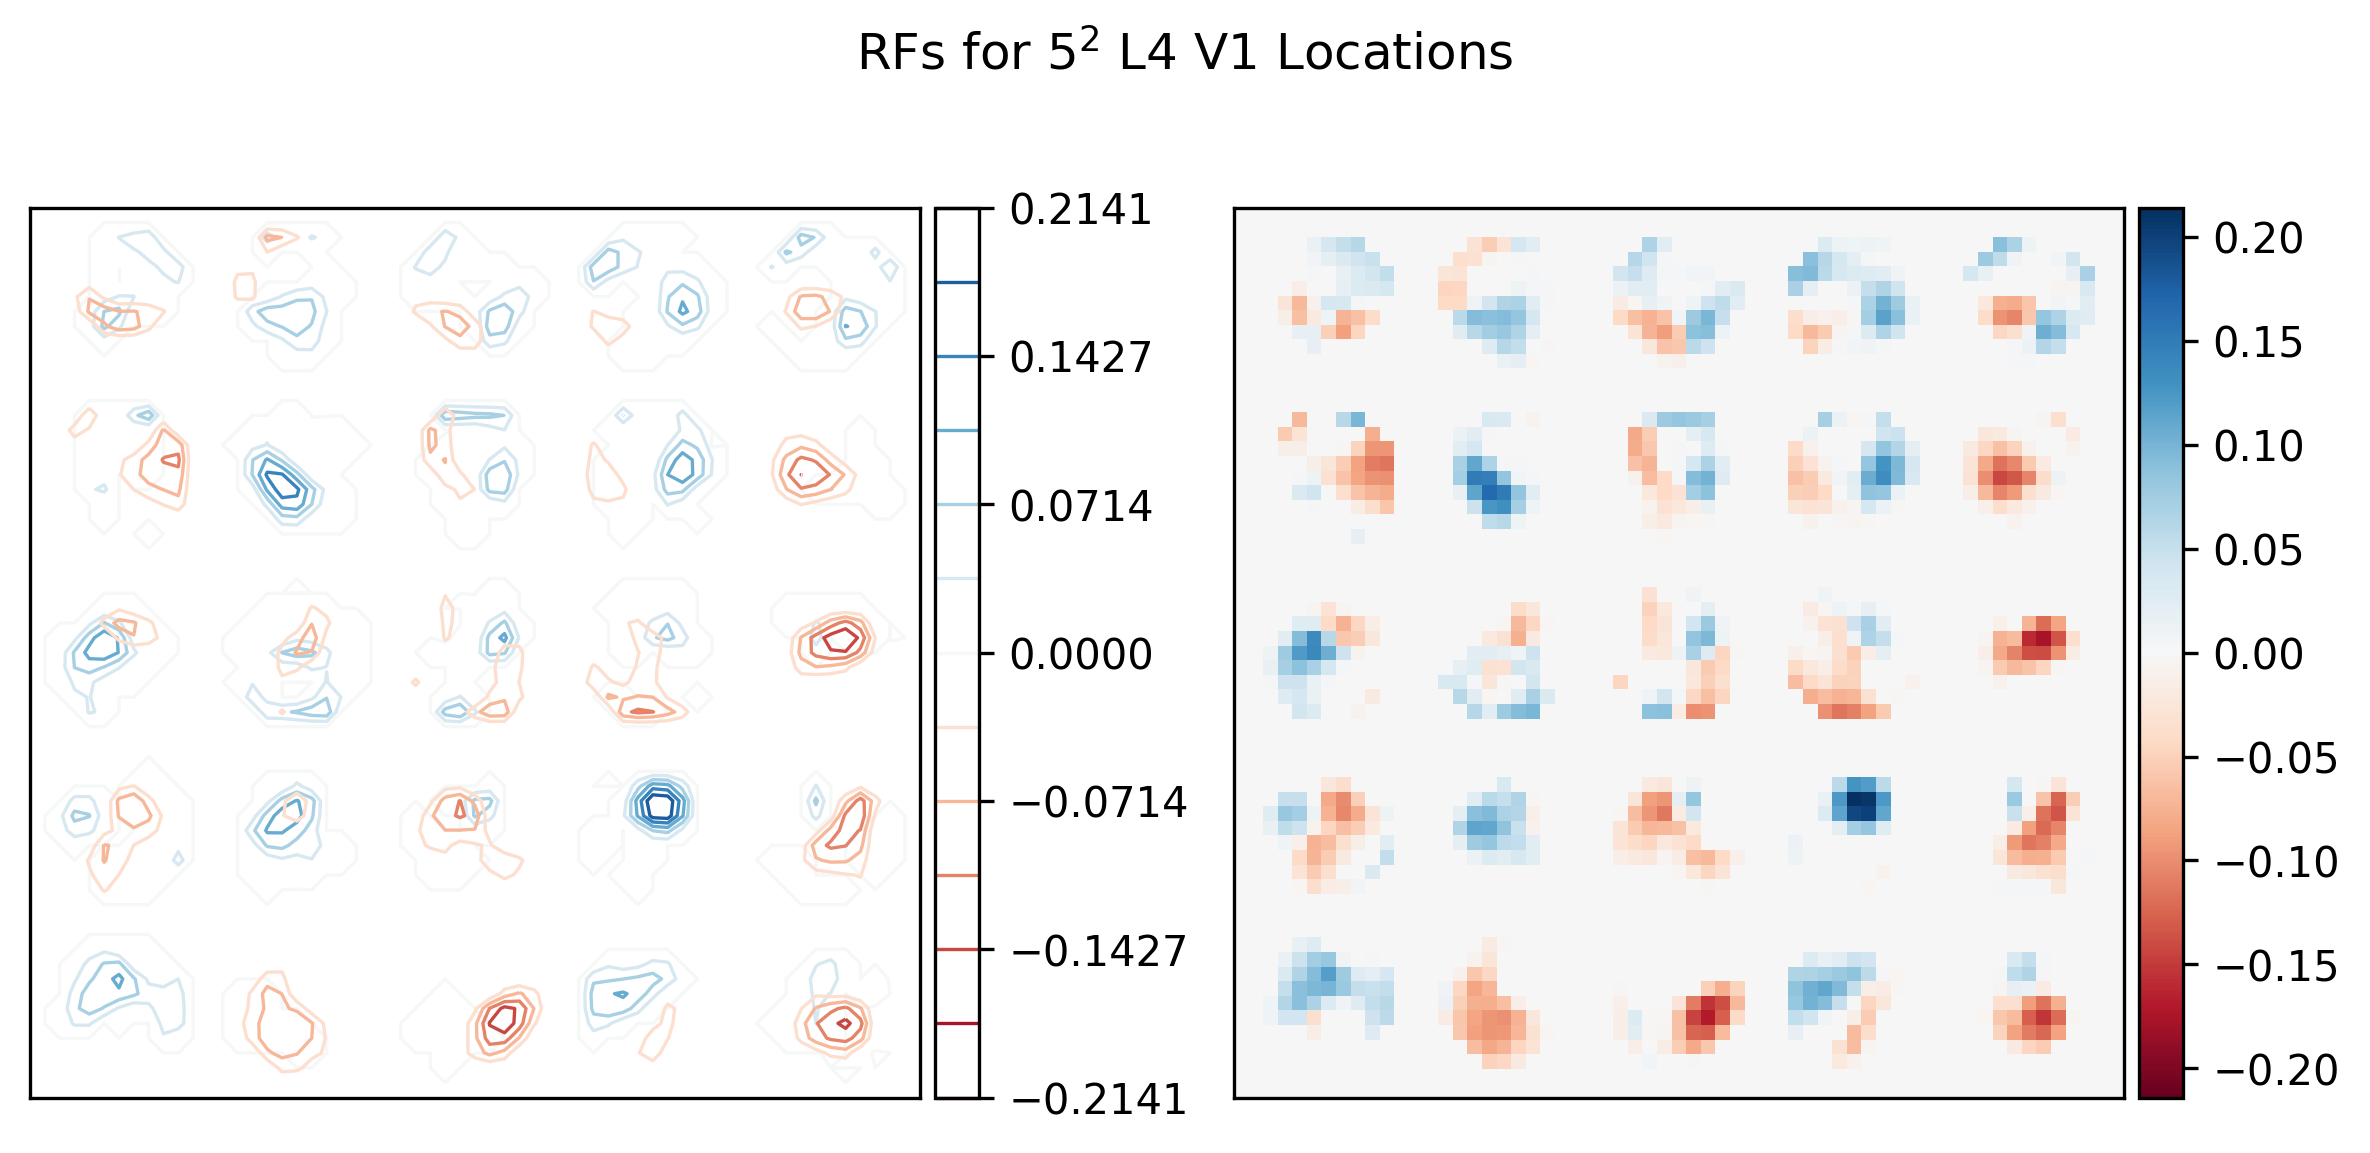

In [15]:
load_location = 'local'
load_path = data_dir + "layer4/{s}/v{v}/".format(s=config_name,v=Version)
probe_config_dict = pickle.load(open(load_path + "config_v{v}.p".format(v=Version),"rb"))
probe_config_dict.update({"config_name" : config_name})
probe_config_dict["Wlgn_to4_params"].update({
    "W_mode": "load_from_external",
    "load_from_prev_run" : Version})
net = network.Network(Version,probe_config_dict,load_location=load_location,verbose=False)

_,Wlgnto4,arbor_on,arbor_off,arbor2,_,W4to4 = net.system
rA = ceil(config_dict["Wlgn_to4_params"]["r_A_on"] * probe_config_dict["Wlgn_to4_params"].get("r_lim",1.) * N4)
dA = 2*rA+1

idxs = [2,6,10,14,18]

wff = np.zeros((N4pop,Nlgnpop,len(idxs)*(dA+1)+1,len(idxs)*(dA+1)+1))
for i in range(len(idxs)):
    for j in range(len(idxs)):
        this_wff = Wlgnto4.reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn)[:,:,idxs[i],idxs[j],:,:]
        wff[:,:,1+i*(dA+1):1+i*(dA+1)+dA,1+j*(dA+1):1+j*(dA+1)+dA] =\
               np.roll(this_wff,(rA-idxs[i],rA-idxs[j]),axis=(-2,-1))[:,:,:dA,:dA]
rf = wff[:,0]-wff[:,1]

fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=300)
fig.subplots_adjust(hspace=.1, wspace=.3)
doubcontbar(fig,axs[0],wff[0,0],-wff[0,1],
            cmap='RdBu',levels=np.linspace(-np.max(np.abs(wff[0])),np.max(np.abs(wff[0])),13),linewidths=0.8)
imshowbar(fig,axs[1],rf[0],cmap='RdBu',vmin=-np.max(np.abs(rf[0])),vmax=np.max(np.abs(rf[0])))

fig.suptitle(r'RFs for {:d}$^2$ L4 V1 Locations'.format(len(idxs)))
fig.tight_layout()

In [16]:
reload(probe_RFs)

Version = 31
net,act,phase = probe_RFs.probe_RFs_one_layer(Version,config_name)

mode in get_RFs load_from_external
 
Load ff connection from version 31
 
profile_conn Gaussian
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)

CHECK CONN VALS Gaussian 0.12469805626552581 0.12579189886434622 0.1793360701824091 0.7073553255752668
orig max ew 2.5719794736235406 0.95
max_ew 0.95
WEE=4.210764553553036,WEI=3.6936531171517855,WIE=4.247701084724553,WII=3.6936531171517855
omega_i=Wie-Wee=0.036936531171517295
omega_e=Wii-Wei=0.0

mode in generate_inputs moving_grating_online_sharp
lgn (2, 1200, 1, 4, 10)
(2, 3, 400, 4, 10)
(2, 400, 4, 10, 3)
(2, 400, 4, 3, 10)
(2, 400, 3, 4, 10)
Wlgn_to_4 (4, 400, 400) (2, 400, 3, 4, 10)
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 2.5777170490993173 2.5777170490993173
pref_phase 2.5777170490993173 2.5777170490993173
Spat frequency=60, orientation=0 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.0 60
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 1.933287786824488 1.933287786824488
pref_phase 1.933287786824488 1.933287786824488
Spat frequency=60, orientation=45 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.7853981633974483 60
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 2.5777170490993173 2.5777170490993173
pref_phase 2.5777170490993173 2.5777170490993173
Spat frequency=60, orientation=90 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 1.5707963267948966 60
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 1.933287786824488 1.933287786824488
pref_phase 1.933287786824488 1.933287786824488
Spat frequency=60, orientation=135 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 2.356194490192345 60
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 1.933287786824488 1.933287786824488
pref_phase 1.933287786824488 1.933287786824488
Spat frequency=80, orientation=0 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.0 80
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 2.5777170490993173 2.5777170490993173
pref_phase 2.5777170490993173 2.5777170490993173
Spat frequency=80, orientation=45 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.7853981633974483 80
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 1.933287786824488 1.933287786824488
pref_phase 1.933287786824488 1.933287786824488
Spat frequency=80, orientation=90 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 1.5707963267948966 80
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 3.222146311374147 3.222146311374147
pref_phase 3.222146311374147 3.222146311374147
Spat frequency=80, orientation=135 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 2.356194490192345 80
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 3.222146311374147 3.222146311374147
pref_phase 3.222146311374147 3.222146311374147
Spat frequency=100, orientation=0 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.0 100
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 1.2888585245496587 1.2888585245496587
pref_phase 1.2888585245496587 1.2888585245496587
Spat frequency=100, orientation=45 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.7853981633974483 100
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 3.222146311374147 3.222146311374147
pref_phase 3.222146311374147 3.222146311374147
Spat frequency=100, orientation=90 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 1.5707963267948966 100
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 3.866575573648976 3.866575573648976
pref_phase 3.866575573648976 3.866575573648976
Spat frequency=100, orientation=135 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 2.356194490192345 100


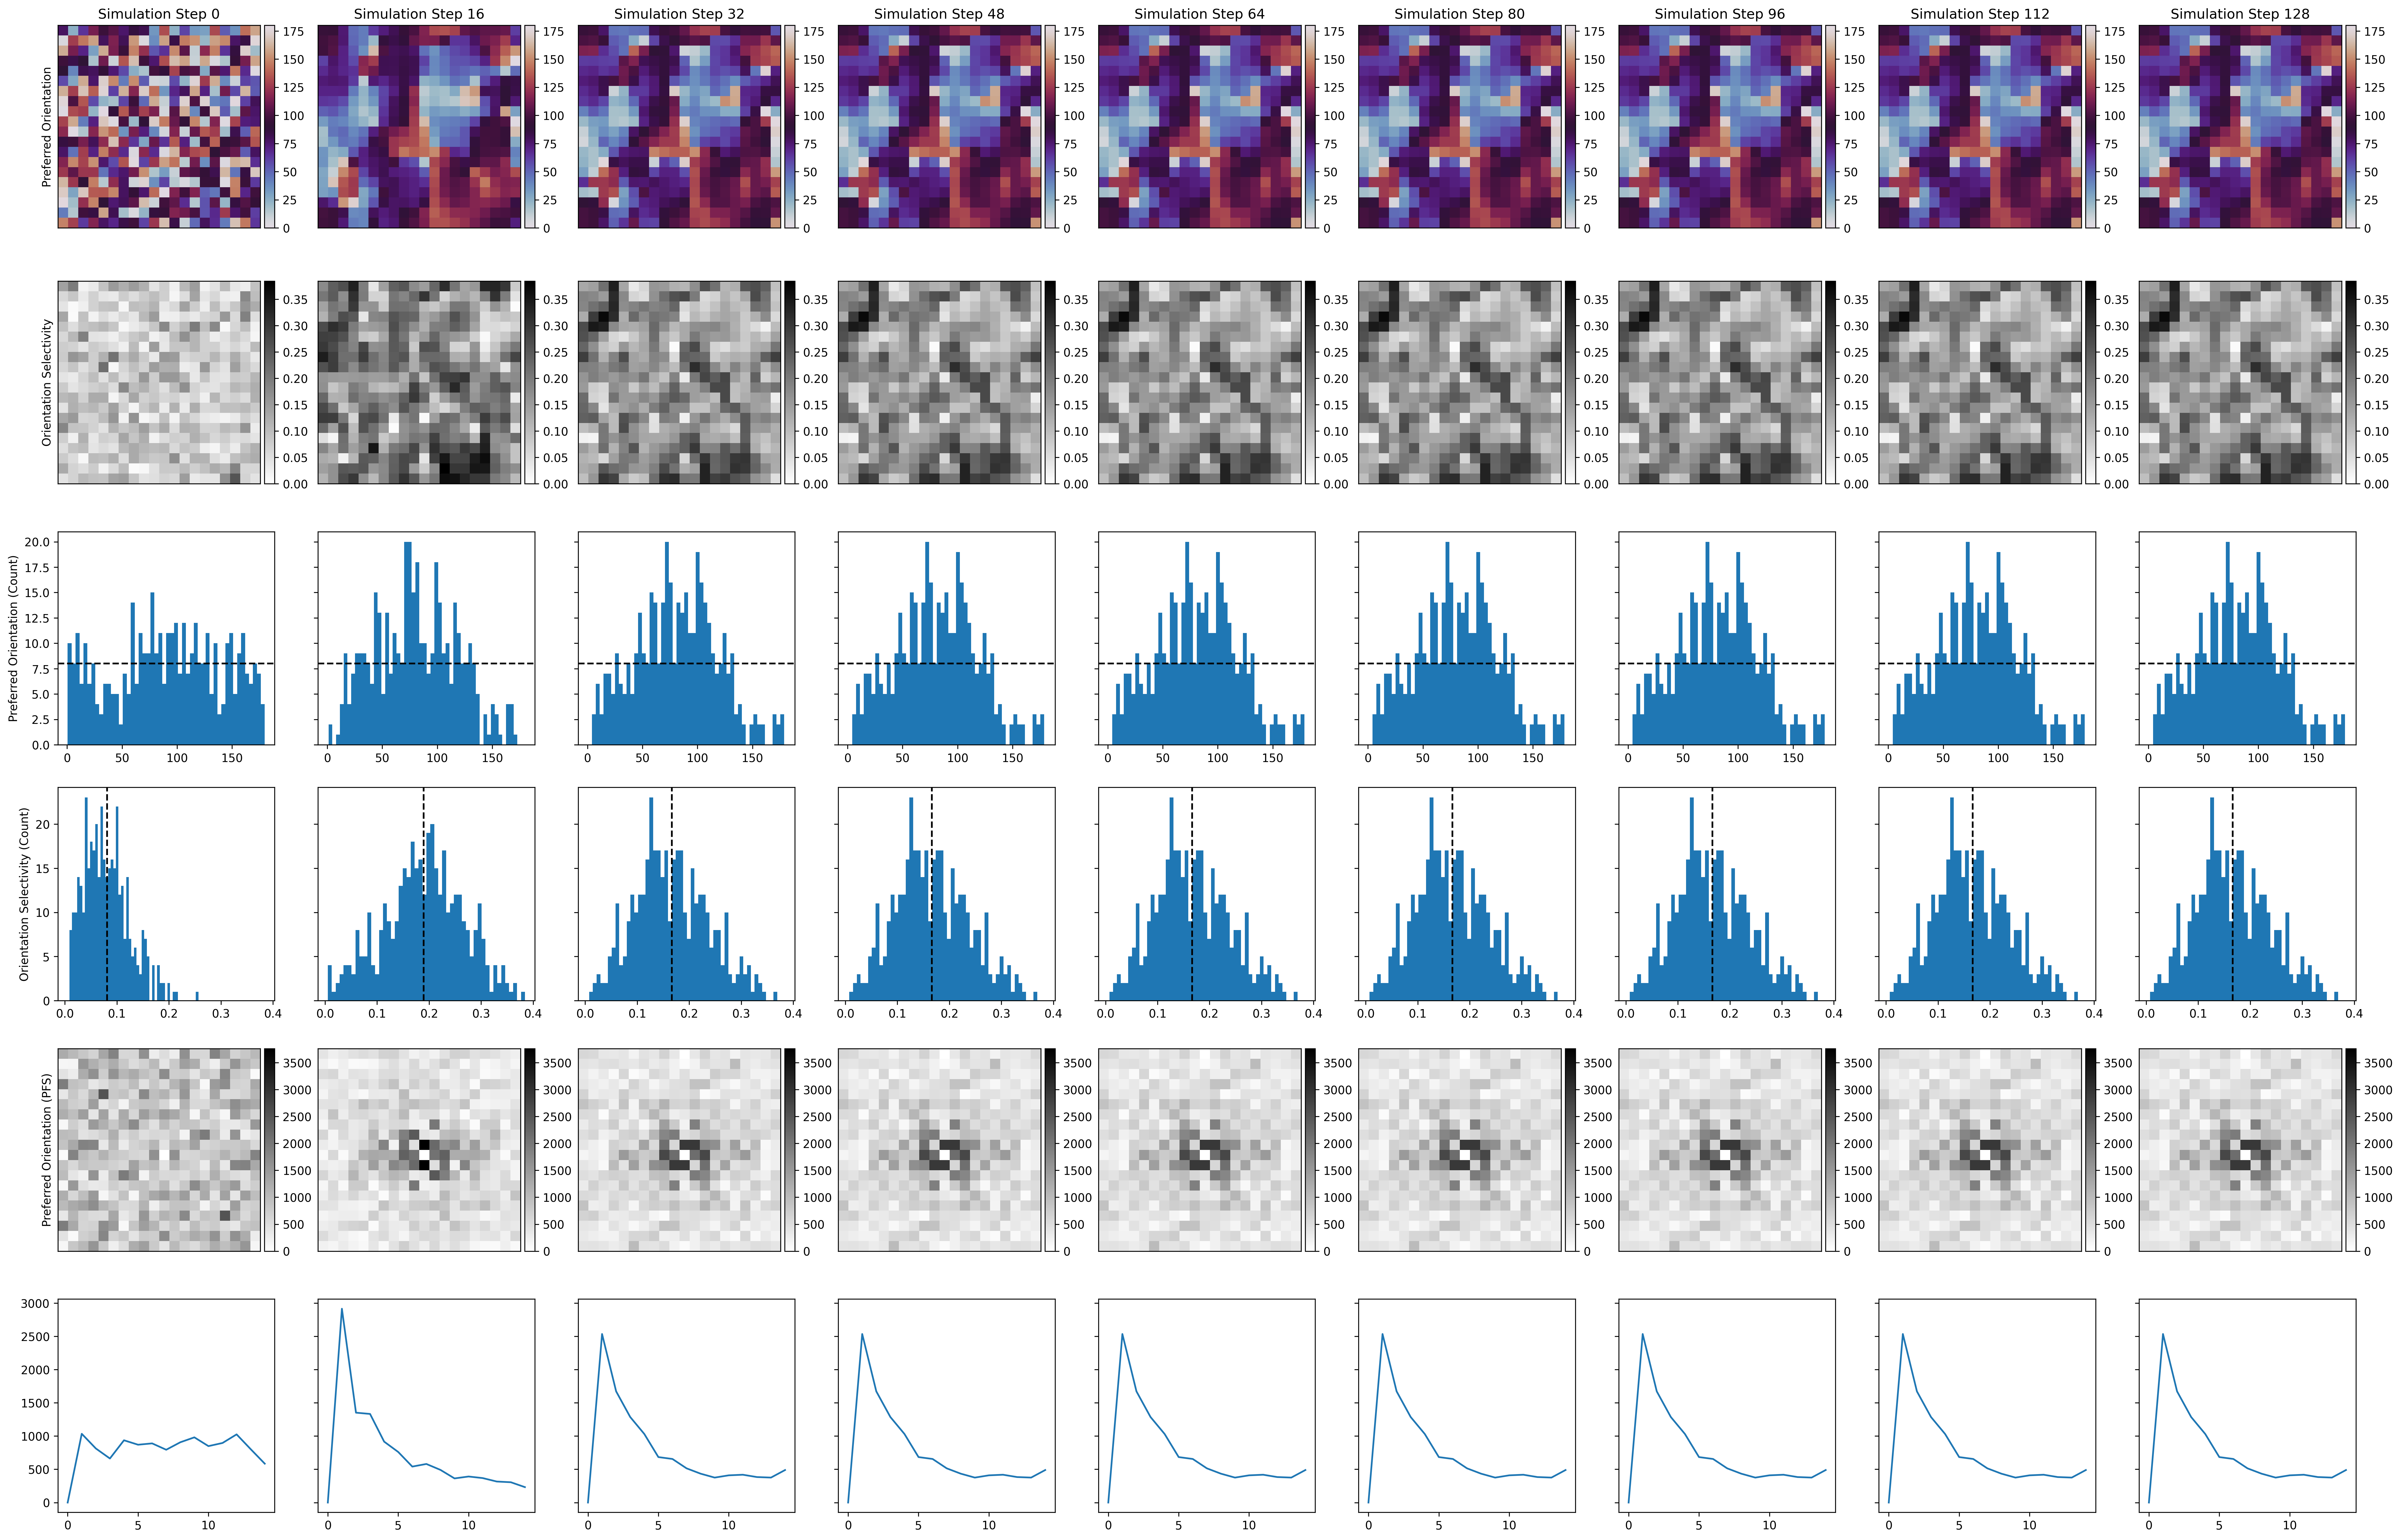

In [9]:
def get_ori_sel(opm,calc_fft=True):
    sel = np.abs(opm)
    ori = np.angle(opm)/2
    ori = ori - (np.sign(ori)-1)*0.5*np.pi
    ori *= 180/np.pi
    
    if calc_fft:
        ori_fft = np.abs(np.fft.fftshift(np.fft.fft2(ori - np.nanmean(ori))))
        ori_fps = np.zeros(int(np.ceil(N4//2*np.sqrt(2))))

        grid = np.arange(-N4//2,N4//2)
        x,y = np.meshgrid(grid,grid)
        bin_idxs = np.digitize(np.sqrt(x**2+y**2),np.arange(0,np.ceil(N4//2*np.sqrt(2)))+0.1)
        for idx in range(0,int(np.ceil(N4//2*np.sqrt(2)))):
            ori_fps[idx] = np.mean(ori_fft[bin_idxs == idx])
        
        return ori,sel,ori_fft,ori_fps
    else:
        return ori,sel

maxver = 128
Vers = np.arange(0,maxver+1,np.fmax(1,maxver//8))-1

oris = np.zeros((len(Vers),N4,N4))
sels = np.zeros((len(Vers),N4,N4))
ori_ffts = np.zeros((len(Vers),N4,N4))
ori_fpss = np.zeros((len(Vers),int(np.ceil(N4//2*np.sqrt(2)))))

for idx,Version in enumerate(Vers):
    if Version == -1:
        probe_config_dict = misc.load_external_params("params_"+config_name,False)
        probe_config_dict.update({
                        "RF_mode" : "initialize",
                        "system" : "one_layer",
                        "Version" : Version,
                        })
        net = network.Network(Version,probe_config_dict,verbose=False)
    else:
        load_location = 'local'
        load_path = data_dir + "layer4/{s}/v{v}/".format(s=config_name,v=Version)
        probe_config_dict = pickle.load(open(load_path + "config_v{v}.p".format(v=Version),"rb"))
        probe_config_dict["Wlgn_to4_params"].update({
            "W_mode": "load_from_external",
            "load_from_prev_run" : Version})
        net = network.Network(Version,probe_config_dict,load_location=load_location,verbose=False)

    _,Wlgnto4,arbor_on,arbor_off,arbor2,_,W4to4 = net.system
    Wlgnto4 = np.array(Wlgnto4).reshape((2,2,400,400))

    sd = Wlgnto4[:,0,...] - Wlgnto4[:,1,...]
    sd = sd.reshape((2,20,20,20,20))
    rA = np.ceil(config_dict["Wlgn_to4_params"]["r_A_on"] * probe_config_dict["Wlgn_to4_params"].get("r_lim",1.) * N4)
    DA = 2*rA + 5
    opm,Rn = analysis_tools.get_response(sd[0],DA)
    
    oris[idx],sels[idx],ori_ffts[idx],ori_fpss[idx] = get_ori_sel(opm)

fig,axs = plt.subplots(6,len(Vers),figsize=(4*len(Vers),4*6),dpi=300,sharex='row',sharey='row')
for i,Version in enumerate(Vers):
    imshowbar(fig,axs[0,i],oris[i],cmap='twilight',vmin=0,vmax=180)
    imshowbar(fig,axs[1,i],sels[i],cmap='binary',vmin=0,vmax=np.max(sels))
    nbin = 50
    axs[2,i].hist(oris[i].flatten(),nbin)
    axs[2,i].axhline(N4*N4/nbin,color='k',ls='--')
    axs[3,i].hist(sels[i].flatten(),nbin)
    axs[3,i].axvline(np.mean(sels[i].flatten()),color='k',ls='--')
    
    imshowbar(fig,axs[4,i],ori_ffts[i],cmap='binary',vmin=0,vmax=np.max(ori_ffts))
    axs[5,i].plot(np.arange(0,np.ceil(N4//2*np.sqrt(2))),ori_fpss[i])
    
    axs[0,i].set_title('Simulation Step {:d}'.format(Version+1))
    
axs[0,0].set_ylabel('Preferred Orientation')
axs[1,0].set_ylabel('Orientation Selectivity')
axs[2,0].set_ylabel('Preferred Orientation (Count)')
axs[3,0].set_ylabel('Orientation Selectivity (Count)')
axs[4,0].set_ylabel('Preferred Orientation (DFT)')
axs[4,0].set_ylabel('Preferred Orientation (PFS)')

plt.savefig("./../plots/Ori_Sel_Dev_FF_Plasticity_"+config_name+".pdf")